ASSIGNMENT 1: NEURAL NETWORKS

1. Write the entire code of the given Handwritten image recognition on your own and run it and obtain your loss and accuracy

2. Tuning your hyper parameters: take 3 values of lr and batch size each and check which works best

3. Write a digit on paper and pass it on to the model and view the outputs. see wheteher it works or not, if not think of of a reason why?

In [ ]:
import numpy as np                                                              #importing important libraries.
import matplotlib.pyplot as plt                                                 #importing important libraries.
import pandas as pd                                                             #importing important libraries.
import keras                                                                    #importing important libraries.
from keras.datasets import mnist                                                #importing important libraries.

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()                         #loading the training dataset.
print(x_train.shape)
x_train[0][0][5]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


np.uint8(0)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#Creating a neural network of 3 layers just as in sample code

class NN(nn.Module):
  def __init__(self, input_size, output_size):
    super(NN, self).__init__()
    self.fc1 = nn.Linear(input_size, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, output_size)
    self.bn1 = nn.BatchNorm1d(256)
    self.bn2 = nn.BatchNorm1d(128)
    self.dropout = nn.Dropout(0.19)

  def forward(self, x):

    x = x.view(x.size(0), -1)
    x = F.relu(self.bn1(self.fc1(x)))
    x = self.dropout(x)
    x = F.relu(self.bn2(self.fc2(x)))
    x = self.dropout(x)
    x = self.fc3(x)
    return x

In [ ]:
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
  def __init__(self, images, labels):
    self.images = images
    self.labels = labels
  def __len__(self):
    return len(self.images)
  def __getitem__(self, index):
    image = self.images[index]
    label = self.labels[index]
    return image, label

In [ ]:
batch_sizes = [32, 64, 128]
num_epochs = 40
learning_rates = [0.001, 0.00125, 0.0015]
input_size = 28*28
output_size = 10
Loss = [[] for _ in range(len(batch_sizes))]

In [ ]:
bs = batch_sizes[2]
lr = learning_rates[0]
train_data = DataLoader(dataset(x_train, y_train),
               batch_size=bs,
               shuffle=True)

test_data = DataLoader(dataset(x_test, y_test),
               batch_size=bs,
               shuffle=True)

In [ ]:
model  = NN(input_size = input_size, output_size = output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [ ]:
#==================================================TRAINING==================================================#
# ._____________. .______.          .______       ._____________.*._______     ___. ._____________. ._______     ___.    _________
#*|_____   _____|*|   _   \******* /  __.  \******|_____   _____| |       \****|  |*|_____   _____|*|       \****|  |***/   ______\******
#******|   |**** *|  |_|   )******/  /___\  \**********|   |******|   |\   \***|  |* ****|   |******|   |\   \***|  |**/   /*************
#******|   |**** *|       /******/   .___.   \*********|   |******|   |*\   \**|  |* ****|   |******|   |*\   \**|  |*|   /*** ______****
#******|   |**** *|   |\  \*****/   /*****\   \********|   |******|   |**\   \*|  |* ****|   |******|   |**\   \*|  |*|   \***|__    )***
#******|   |**** *|   | \  \***/   /*******\   \**.____|   |____.*|   |***\   \|  |*.____|   |____.*|   |***\   \|  |**\   \____/   /****
#******|___|**** *|___|  \__\*/___/*********\___\ |_____________|*|___|****\______|*|_____________|*|___|****\______|***\__________/*****
i = 0
#iteration = [i for i in range (41)]
for epoch in range(num_epochs):
  i += 1
  model.train()
  running_loss = 0.0
  for images, labels in train_data:
    images = images.float()
    labels = labels.long()
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    #if i%10 == 0: print(i)
  epoch_loss = running_loss/len(train_data)
  #if (bs == 32):
  #  Loss[0].append(epoch_loss)
  #elif (bs == 64):
  #  Loss[1].append(epoch_loss)
  #elif (bs == 128):
  #  Loss[2].append(epoch_loss)
  print(i, " Epoch: ", (epoch+1)/(num_epochs), " Loss: ", epoch_loss)



1  Epoch:  0.025  Loss:  0.28316190647386286
2  Epoch:  0.05  Loss:  0.11653830549483106
3  Epoch:  0.075  Loss:  0.08910284628436319
4  Epoch:  0.1  Loss:  0.07288389243701818
5  Epoch:  0.125  Loss:  0.062273171879271706
6  Epoch:  0.15  Loss:  0.05448811031036031
7  Epoch:  0.175  Loss:  0.048433415165770724
8  Epoch:  0.2  Loss:  0.04269515264775358
9  Epoch:  0.225  Loss:  0.038827416441862043
10  Epoch:  0.25  Loss:  0.03556171684875401
11  Epoch:  0.275  Loss:  0.033037518796973676
12  Epoch:  0.3  Loss:  0.03065735620629193
13  Epoch:  0.325  Loss:  0.030337800215214872
14  Epoch:  0.35  Loss:  0.027984457576015927
15  Epoch:  0.375  Loss:  0.027389812332365527
16  Epoch:  0.4  Loss:  0.026330475729933855
17  Epoch:  0.425  Loss:  0.024157495378751927
18  Epoch:  0.45  Loss:  0.020897953243090163
19  Epoch:  0.475  Loss:  0.021934542833501772
20  Epoch:  0.5  Loss:  0.020034678590628924
21  Epoch:  0.525  Loss:  0.019481535860102005
22  Epoch:  0.55  Loss:  0.01903421462410247


In [ ]:
#==================================================TESTING==================================================#
model.eval()
correct = 0
total = 0
for images, labels in test_data:
  images = images.float()
  labels = labels.long()
  output = model(images)
  loss = criterion(output, labels)
  correct += (output.argmax(1) == labels).sum().item()
  total += labels.size(0)
print(100*correct/total)

98.44


Inferences:
<br>

Table 1: Loss dependency on batch size and learning rate.
|Learning_rate\Batch_size|    32    |    64    |    128   |
|:-----------------------|:--------:|:--------:|:--------:|
|0.001                   |  0.0258  |  0.0179  |  0.0118  |
|0.00125                 |  0.0250  |  0.0166  |  0.0130  |
|0.0015                  |  0.0277  |  0.0165  |  0.0134  |
<br>

Table 2: Accuracy dependency on batch size and learning rate.
<br>

| Learning_rate\Batch_size |   32    |    64   |   128   |
|:-------------------------|:-------:|:-------:|:-------:|
|0.001                     |  98.46  |  98.37  |  98.44  |
|0.00125                   |  98.54  |  98.48  |  98.56  |
|0.0015                    |  98.37  |  98.56  |  98.46  |
<br>


In [ ]:
from google.colab import drive
from PIL import Image
import torchvision.transforms as transforms
images = [torch.zeros(1,28,28) for _ in range(10)]
images[0] = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/0.jpg")
images[1] = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/1.jpg")
images[2] = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/2.jpg")
images[3] = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/3.jpg")
images[4] = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/4.jpg")
images[5] = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/5.jpg")
images[6] = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/6.jpg")
images[7] = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/7.jpg")
images[8] = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/8.jpg")
images[9] = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/9.jpg")

i = 0
image = Image.open("/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/mnist8.png")
transform = transforms.Compose([
    transforms.Grayscale(1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    #transforms.Lambda(lambda x: 1-x),
    transforms.Normalize((0.1307,), (0.3081,))
])

image = transform(image)
#image = image.view(1, 28 , 28)
print("Image shape:", image.shape)
#image = image.float()
#image = 1 - image
#image = image.sqrt()
#min_val = image.min()
#max_val = image.max()
image = (image - image.min())/(image.max()-image.min()) * 255
#image[image < 0.4] = 0.0
print(image.max(), image.min())

Image shape: torch.Size([1, 28, 28])
tensor(255.) tensor(0.)


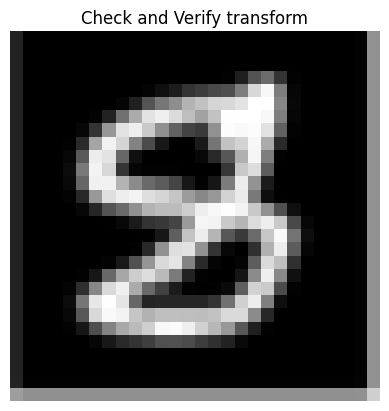

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Check and Verify transform")
plt.axis("off")
plt.show()

In [ ]:
model.eval()

with torch.no_grad():
    output = model(image)
    prediction = output.argmax(dim=1)

print("Predicted digit:", prediction.item())

Predicted digit: 3


|Actual|Recognised|
|:----:|:--------:|
|  0   |    0     |
|  1   |    3     |
|  2   |    2     |
|  3   |    3     |
|  4   |    7     |
|  5   |    5     |
|  6   |    6     |
|  7   |    3     |
|  8   |    3     |
|  9   |    3     |
